In [95]:
#IMPORTAÇÃO DAS BIBLIOTECAS
import pandas as pd #PANDAS = PANEL DATAS
from statsmodels.tsa.seasonal import seasonal_decompose #STAS = ESTATISTICAS/MODELS = MODELOS
import matplotlib.pyplot as plt #MATPLOTLIB = BIBLIOTECA DE PLOTS MATEMÁTICOS VINDA COM BASE DO MATLAB
import seaborn as sns #IMPORTAR A BIBLIOTECA SEABORN PARA VISUALIZAÇÂO DE DADOS

sns.set_style()

%matplotlib inline

In [107]:
data = '/content/Electric_Production.csv' #IMPORTANDO OS DADOS DO ARQUIVO CSV

df1 = pd.read_csv(data)
df1.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


# Dicionário de dados

In [108]:
for i in df1.columns:
  print('`', i, '`', ' -\n')

` DATE ` -

` Value ` -




`DATE` - Tem referência a data na qual foi feita a produção de energia.

---
`Value` - Tem referência a quantidade de energia produzida naquele momento.


In [109]:
# odernar em ordem decescente as variáveis por seus valores ausentes
(df1.isnull().sum() / df1.shape[0]).sort_values(ascending=False)

,0
DATE,0.0
Value,0.0


In [110]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    397 non-null    object 
 1   Value   397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [111]:
# prompt: Using dataframe df1: transforme as colunas DATE Value para float

import pandas as pd
# Convertendo a coluna 'DATE' para o tipo datetime
df1['DATE'] = pd.to_datetime(df1['DATE'])

# Convertendo a coluna 'Value' para o tipo float
df1['Value'] = pd.to_numeric(df1['Value'], errors='coerce')


In [112]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    397 non-null    datetime64[ns]
 1   Value   397 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 KB


In [113]:
#Definir a data como índice
df1.set_index('DATE', inplace=True)

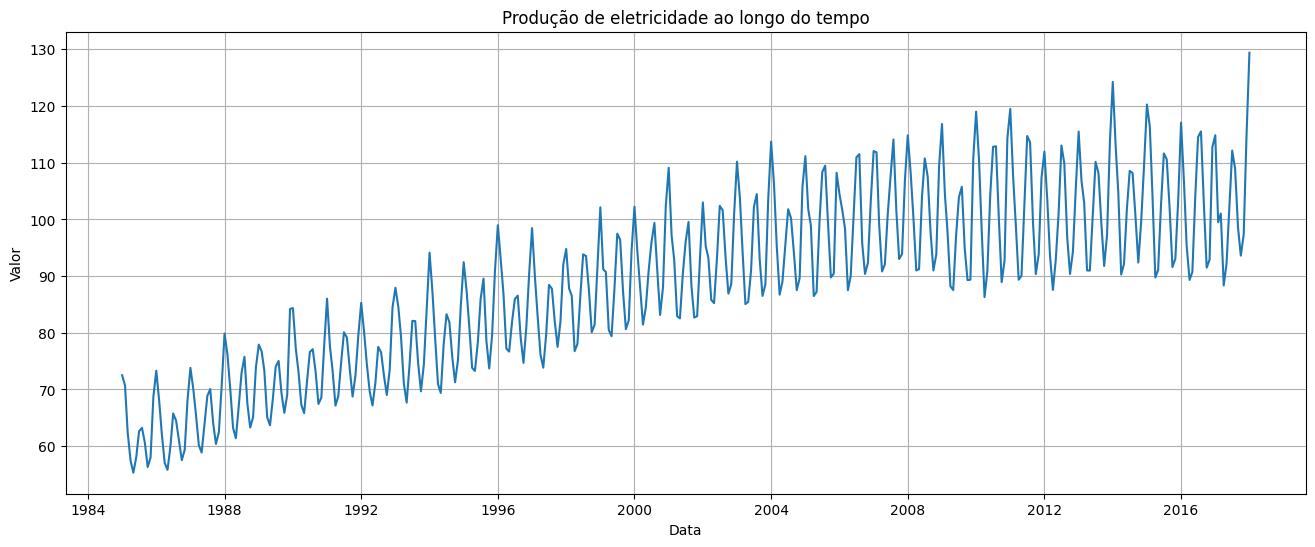

In [119]:
#Criar o gráfico de produção
plt.figure(figsize=(16, 6))
plt.plot(df1['Value'])
plt.title('Produção de eletricidade ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.grid(True)
plt.show()


# CONTEXTO:

O aumento da demanda energética global e as flutuações sazonais fazem com que as empresas de energia precisem otimizar a produção para evitar o desperdício e maximizar a eficiência dessa utilização. Este trabalho propõe uma solução baseada em análise de séries temporais para prever a demanda futura de eletricidade e ajustar a produção de acordo com esses dados, evitando excesso de produção e garantindo a oferta necessária para a demanda atual.

**Nas últimas três décadas, a produção global de energia tem crescido significativamente, impulsionada por três fatores principais:**

* *Crescimento Econômico e Populacional: A industrialização e a urbanização aceleradas ao redor do mundo aumentaram drasticamente a demanda por eletricidade.*

* *Transição para Energias Renováveis: Desde os anos 2000, muitos países implementaram políticas de incentivo para fontes de energia limpa, como solar e eólica, reduzindo a dependência de combustíveis fósseis.*

* *Inovação Tecnológica: Avanços em tecnologias de armazenamento e infraestrutura energética permitiram maior eficiência e expansão na capacidade de produção global.*

Objetivo da Análise:

O objetivo deste estudo é analisar os dados do crescimento da produção de eletricidade a nível global, identificar tendências, prever a demanda futura e otimizar o uso dos recursos. Esta análise é essencial para orientar investimentos, ajustar políticas energéticas e garantir um fornecimento estável de energia globalmente.

# Explicação sobre o gráfico referente a produção elétrica
---
*   O gráfico referente retrata a produção de energia ao longo dos anos, entre o periodo de 1984 até o final de 2016, ou seja um período de em torno de 30 anos, podemos observar que a crescente da produção é constante com alguns leves momentos de estabilização, isso se da ao fato que a população está aumentando o que impacta no consumo de dispositivos eletrônicos, lógico que o mesmo também precisa acompanhar essa alta demanda de dispositivos. O gráfico também possui algumas variações com picos de produção de energia, na qual está referente aos meses em que o uso de luz e ar condicionados são menores, isso também pode se dar ao fator de condições climáticas que podem afetar a maneira de produção.

* Podemos reparar também que nos períodos de 2004 até 2012 tivemos uma estabilização referente a produção de energia que pode ser tomada como base a questão da estabilização da produção de equipamentos eletrônicos.

* Após esta estabilização tivemos um avanço significativo na produção em massa como por exemplo a maior popularização de telefones celulares que acabaram se tornando smartphones, o que também influência no aumento de investimentos e politicas novas sendo aplicadas neste setor o qual também as questões econômicas impactam este setor.








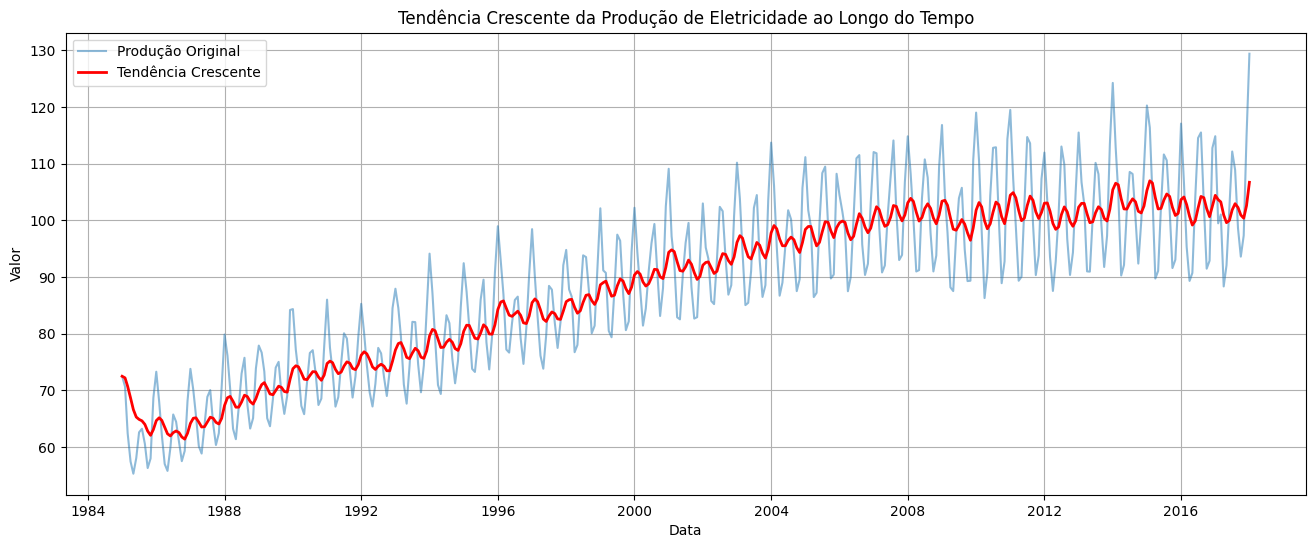

In [120]:
# Supondo que o df1 já tenha os dados da série temporal
# Calcular a média móvel exponencial para mostrar a tendência
df1['Tendencia'] = df1['Value'].ewm(span=12, adjust=False).mean()  # Ajuste o 'span' conforme necessário

# Criar o gráfico com a linha da tendência
plt.figure(figsize=(16, 6))

# Gráfico original
plt.plot(df1['Value'], label='Produção Original', alpha=0.5)

# Gráfico com a tendência crescente
plt.plot(df1['Tendencia'], label='Tendência Crescente', color='red', linewidth=2)

plt.title('Tendência Crescente da Produção de Eletricidade ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.grid(True)
plt.legend()
plt.show()


**1. A série temporal apresenta uma tendência?**
   *- A série está subindo, descendo ou permanece constante ao longo do tempo?*

   R= A série tende a ter uma crescente a longo prazo, porém com momentos de estabilização de acordo com a demanda.

**2. Existem padrões sazonais na série temporal?**
   *- Há algum comportamento recorrente em determinados períodos (mensal, semanal, anual)?*

   R= Sim, o gráfico tem uma variação muito forte e visivel que remete aos meses no qual o consumo é maior, logo a produção precisa acompanhar essa demanda para suprir a necessidade.

**3. A variabilidade da série temporal é constante ao longo do tempo?**
   *- O comportamento da série é homogêneo ou muda de forma significativa em diferentes intervalos?*

   R= O comportamento é homogêneo, referente aos avanços que os dispositivos eletrônicos sofrem e também a demanda e crescente da população que consome energia.

**4. Há eventos ou outliers na série que precisam ser considerados?**
   *- Existem picos ou quedas bruscas que fogem do comportamento esperado e precisam de investigação?*

   R= Ao final do gráfico referente ao ano de 2016 podemos notar um comportamento um pouco mais especifico se comparado com a crescente dos anos anteriores, o gráfico tendeu a descer porém por uma razão ocorreu uma subida brusca, razão que pode ser dada a um ano que sofreu maiores avanços em relação aos dispositivos e a sua popularização fora as condições climáticas que sofreram uma variação maior no seguinte ano.

**5. A série temporal é estacionária ou não-estacionária?**
   *- Os parâmetros da série (média e variância) são constantes ao longo do tempo ou variam? Isso pode impactar o modelo a ser utilizado.*

   R= É uma série não-estacionária devido a sazonalidade, ocorre uma variação por mais que tenha um padrão de picos de produção e uma produção mais baixa.

# Referências:

https://github.com/carlosfab/escola-data-science/blob/master/notebooks/Aula_001_S%C3%A9ries_Temporais_(Time_Series)_Parte_1.ipynb